# Linear Regression

## 1. calculate the MSE

$$
MSE = \sum_i (\hat y-y_i)^2
$$


## 2. calculate the $R^2$ for X and Y

$$
R^2=(1-\frac{\rm MSE\ of\ regression\ line}{\rm MSE\ of\ mean\ line})
$$

The $R^2$ is closer to 1, the more accurate the model is. The worst case is $R^2=0$.

# Simple Linear Regression

$$
y= aX + b
$$

In [25]:
from sklearn.linear_model import *
import numpy as np

lm = LinearRegression()
X = np.linspace(0,10,10)
Y = X**2+2*X+3
lm.fit(X[:,np.newaxis], Y)
#lm.score(X,Y) # give the R^2


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Add non-linear features by transforming the X into f(X)

For $degree=2$ case:
$$
f(X) = aX^2+bX+c = a X_1 + b X_2 + c X_3 = (a,b,c)^T*(X_1,X_2,X_3) = \sum^3_{i=1} A_i X_i
$$
where $X_1=X^2, X_2=X, X_3=1$, and $A_1=a, A_2=b, A_3=c$

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_   = poly.fit_transform(X[:,np.newaxis]) 

lr = LinearRegression()
lr.fit(X_,Y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

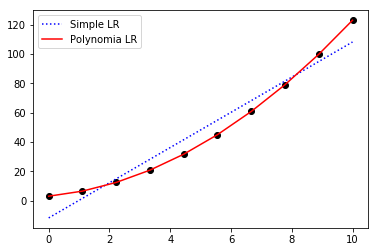

In [47]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, c='k')
plt.plot(X, lm.predict(X[:, np.newaxis]), 'b:',label='Simple LR')
plt.plot(X, lr.predict(X_), 'r-',label='Polynomia LR')
plt.legend()

## Mean Squared Error (MSE) between your predicted values Yhat and actual values Y

In [58]:
from sklearn.metrics import mean_squared_error


# The coefficients
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
print('R2:', lr.score(X_,Y))
print('MSE:',mean_squared_error(lr.predict(X_),Y))

Coefficients: 
 [0. 2. 1.]
Intercept: 
 2.999999999999986
R2: 1.0
MSE: 1.2400893430074305e-28


## Using pipeline

In [ ]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)

# Model Validation

# 1. Cross_Validation

In [ ]:
from sklearn.model_selection import cross_val_sc
scores= cross_val_score(lr, x_data, y_data, cv=10)